In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
plt.style.use('fivethirtyeight')

In [ ]:
from sklearn.tree import DecisionTreeClassifier 


In [3]:
df = pd.read_csv('youtubefinal.csv')

In [4]:
df = df.drop(['index'],axis = 1)

In [5]:
df = df.drop(['Unnamed: 0'],axis = 1) 

In [6]:
df = df.drop(['Unnamed: 0.1'],axis = 1)

In [7]:
df = df.drop(['channel_title'],axis = 1)

In [8]:
df['category_id'] = df['category_id'].astype(int)

In [9]:
df = df.drop(['category_name'],axis = 1)

In [41]:
df

,category_id,likes_log,views_log,dislikes_log,comment_log,acoustic,actually,ad,adam,amazon,...,went,white,wild,wired,without,world,wrong,year,years,young
0,22,10.96,13.53,8.00,9.68,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24,11.48,14.70,8.72,9.45,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23,11.89,14.98,8.58,9.01,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,24,9.23,12.75,6.50,7.67,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24,11.79,14.56,7.60,9.77,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40856,15,10.55,14.34,7.23,7.89,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40857,22,11.00,13.88,5.95,8.28,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40858,24,10.78,13.88,6.94,8.29,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40859,1,12.17,15.55,7.95,9.48,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
x = df.drop('category_id', axis=1)
y = df.category_id

In [220]:
unique_words = list(x.columns.values)

In [221]:
pca2 = PCA(n_components=2)
pca2.fit(x)
x2_pca = pca2.transform(x)
x2_pca = pd.DataFrame(x2_pca)

pca3 = PCA(n_components=3)
pca3.fit(x)
x3_pca = pca3.transform(x)
x3_pca = pd.DataFrame(x3_pca)

In [222]:
pca2.explained_variance_

array([13.3047871 ,  0.95974789])

In [223]:
pca3.explained_variance_

array([13.3047871 ,  0.95974789,  0.64782299])

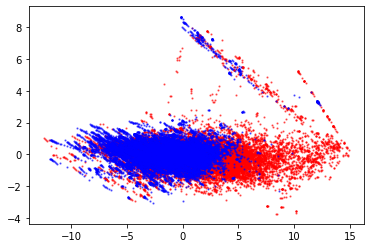

In [225]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x2_pca[0][:21000], x2_pca[1][:21000], s=1.5, alpha = 0.5, c = 'red')
plt.scatter(x2_pca[0][21001:], x2_pca[1][21001:], s=1.5, alpha = 0.5, c = 'blue')

In [13]:
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 21)

In [149]:
results = pd.DataFrame()

In [150]:
def evaluate(test, pred, model):
    return [model, 
            precision_score(test, pred, average = 'weighted'), 
            recall_score(test, pred,average = 'weighted'), 
            accuracy_score(test, pred), 
            f1_score(test, pred, average = 'weighted')]

In [151]:
def print_accuracy_indices(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average = 'weighted')))
    print("Recall Score: {}".format(recall_score(labels, preds, average = 'weighted')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average = 'weighted')))

# K-Nearest Neighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(x_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(x_test, y_test) 
print (accuracy) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(x_test)  

0.7873485868102288


In [151]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 16):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds, average='weighted')
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [152]:
find_best_k(x_train, y_train, x_test, y_test, min_k=1, max_k=25)

Best Value for k: 1
F1-Score: 0.9078596503416098


In [144]:
a = evaluate(y_test, knn_predictions, 'K Nearest Neighbors')

##### Best K is 1 for KNN model

In [19]:
start = time.time()
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(x_train, y_train)
knn_runtime = time.time() - start

In [23]:
knn_pred = knn_classifier.predict(x_test)
print_accuracy_indices(y_test, knn_pred)

Precision Score: 0.9087968860111894
Recall Score: 0.9075003058852319
Accuracy Score: 0.9075003058852319
F1 Score: 0.9078596503416096


## Random Forest

In [24]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
rfclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
rfclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [25]:
# Predicting the Test set results
rfy_pred = rfclassifier.predict(x_test)
# Making the Confusion Matrix
print(pd.crosstab(y_test, rfy_pred, rownames=['Actual'], colnames=['Predicted']))

Predicted   1   2     10   15   17  19   20   22   23    24   25   26   27  \
Actual                                                                       
1          481   0     5    1    0   1    1    2    2    10    2    5    0   
2            0  71     0    0    1   0    0    1    4     4    1    1    1   
10           1   0  1190    0    0   0    1   10    8    22    1   12    9   
15           2   0     3  141    3   2    0    2    3    12    1    2    3   
17           0   1     5    1  376   0    0    2    1    10    5    1    1   
19           1   2     0    0    1  58    0    1    0     1    4    4    1   
20           0   0     1    0    0   0  156    1    2     2    0    0    3   
22           4   1    13    2    2   0    0  534   10    26    8   12    7   
23           2   1    27    3    1   2    0    5  609    34    4   12    4   
24           7   1    29    4    9   2    1   23   19  1860   20   19   11   
25           2   2     5    0    4   0    0    3    2    23  444

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt


y = label_binarize(y, classes=[0,1,2])
n_classes = 3

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.33, random_state=0)

# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [181]:
from sklearn.feature_selection import RFECV
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=2,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWar

/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWar

/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWar

/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWar

/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWar

/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWar

/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWar

/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWar

/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWar

/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWar

/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWar

/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWar

/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWar

/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWar

/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWar

/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWar

TypeError: check_is_fitted() missing 1 required positional argument: 'attributes'

In [118]:
start = time.time()
rfclassifier = RandomForestClassifier(n_estimators=100)
rfclassifier.fit(x_train, y_train)
rf_runtime = time.time() - start

In [170]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf_pred = rfclassifier.predict(x_test)  
print_metrics(y_test, rf_pred)

Precision Score: 0.9321384415368916
Recall Score: 0.9311146457849016
Accuracy Score: 0.9311146457849016
F1 Score: 0.9310317218576445


In [ ]:
# Visualize it as a heatmap
import seaborn
seaborn.heatmap(CM)
plt.show()

In [29]:
feature_importances = pd.DataFrame(rfclassifier.feature_importances_,
                                   index = x.columns,
                                columns=['importance']).sort_values('importance', ascending=False)

In [30]:
feature_importances.head(20)

,importance
likes_log,0.098565
comment_log,0.089081
dislikes_log,0.082033
views_log,0.081479
video,0.022940
official,0.018615
audio,0.014449
trailer,0.012758
makeup,0.009593
vs,0.007480


In [146]:
b = evaluate(y_test, rf_pred, "Random Forest")

# Adaptaive Boosting Tree

In [31]:
from sklearn.ensemble import AdaBoostClassifier

In [32]:
start = time.time()
adaboost_clf = AdaBoostClassifier()
adaboost_clf.fit(x_train, y_train)
ab_runtime = time.time() - start
ab_pred = adaboost_clf.predict(x_test)
print_accuracy_indices(y_test, ab_pred)

Precision Score: 0.23813675464380757
Recall Score: 0.30001223540927446
Accuracy Score: 0.30001223540927446
F1 Score: 0.18297924604238197


/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
pd.crosstab(y_test, ab_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,10,17,24,All
True,,,,,
1,4,13,0,493,510
2,0,0,1,83,84
10,0,441,6,812,1259
15,0,4,0,170,174
17,0,0,21,389,410
19,0,1,2,72,75
20,0,2,8,155,165
22,0,23,1,600,624
23,0,16,3,691,710


In [131]:
c = evaluate(y_test, ab_pred, 'Adapative Boosting Tree')

## Gradient Boosting

In [102]:
start = time.time()
gbt_clf = GradientBoostingClassifier()
gbt_clf.fit(x_train, y_train)
gb_runtime = time.time() - start
gb_pred = gbt_clf.predict(x_test)
print_accuracy_indices(y_test, gb_pred)

Precision Score: 0.7899706275238736
Recall Score: 0.6632815367674049
Accuracy Score: 0.6632815367674049
F1 Score: 0.6653825168529013


In [132]:
d = evaluate(y_test, gb_pred, 'Gradient Boosting')


## SVM

In [92]:
svm_train, svm_test, svmy_train, svmy_test = train_test_split(x, y, test_size = 0.2)


In [97]:
start = time.time()
svm_clf = svm.NuSVC(kernel='rbc',nu=0.01)
svm_clf.fit(svm_train, svmy_train)
svm_runtime = time.time() - start
svm_runtime

168.78318190574646

In [96]:
#As a matter of fact, Looped from 1. to 0.1 (decreasing in decimal units) 
#and still got the error, then just tried with 0.01 and no complaints arose. 
#But of course, you should check the results of fitting your model with that value

In [98]:
svm_pred = svm_clf.predict(svm_test)
print_accuracy_indices(svmy_test, svm_pred)

Precision Score: 0.09698062921351712
Recall Score: 0.13422243974060932
Accuracy Score: 0.13422243974060932
F1 Score: 0.10316529853245203


In [133]:
e = evaluate(y_test, svm_pred, 'SVM')

## Decision Trees

In [105]:
start = time.time()
dt_classifier = DecisionTreeClassifier()  
dt_classifier.fit(x_train, y_train) 
dt_runtime = time.time() - start

In [106]:
dt_pred = dt_classifier.predict(x_test)  
print_metrics(y_test, dt_pred)

Precision Score: 0.8092154188158364
Recall Score: 0.8085158448550104
Accuracy Score: 0.8085158448550104
F1 Score: 0.8087023754970348


In [134]:
f = evaluate(y_test, dt_pred, 'Decision Tree')


## Naive Bayes Classifer


Naive Bayes classifier – Naive Bayes classification method is based on Bayes’ theorem. It is termed as ‘Naive’ because it assumes independence between every pair of feature in the data. Let (x1, x2, …, xn) be a feature vector and y be the class label corresponding to this feature vector.

In [123]:
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
start = time.time()
gnb = GaussianNB().fit(x_train, y_train) 
gnb_predictions = gnb.predict(x_test) 
# accuracy on X_test 
accuracy = gnb.score(x_test, y_test) 
nb_runtime = time.time() - start

print (accuracy) 
# creating a confusion matrix 
nbcm = confusion_matrix(y_test, gnb_predictions)


0.31041233329254864


In [124]:
nbpred = gnb.predict(x_test)  
print_accuracy_indices(y_test, gnb_predictions)

Precision Score: 0.6150252618687081
Recall Score: 0.31041233329254864
Accuracy Score: 0.31041233329254864
F1 Score: 0.3346765537134204


In [135]:
g = evaluate(y_test, nbpred, 'Naive Bayes')


## Multinomial NB

In [34]:
from sklearn.naive_bayes import MultinomialNB

In [120]:
start = time.time()
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_runtime = time.time() - start
mnb_runtime

0.04910898208618164

In [121]:
mnb_pred = mnb.predict(x_test)
print_metrics(y_test, mnb_pred)

Precision Score: 0.6505156352556533
Recall Score: 0.46739263428361677
Accuracy Score: 0.46739263428361677
F1 Score: 0.42182535375112895


/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [136]:
h = evaluate(y_test, mnb_pred, 'Multinomial Naive Bayes')


## Bagging

In [114]:
start = time.time()
bt_classifier = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=100)
bt_classifier.fit(x_train, y_train)
bt_runtime = time.time() - start

In [115]:
bt_pred = bt_classifier.predict(x_test)
print_metrics(y_test, bt_pred)

Precision Score: 0.44461461300402083
Recall Score: 0.3505444757127126
Accuracy Score: 0.3505444757127126
F1 Score: 0.23901948194748962


/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [137]:
i = evaluate(y_test, bt_pred, 'Bagged Trees')


## PCA

Text(0, 0.5, 'Cumulative explained variance')

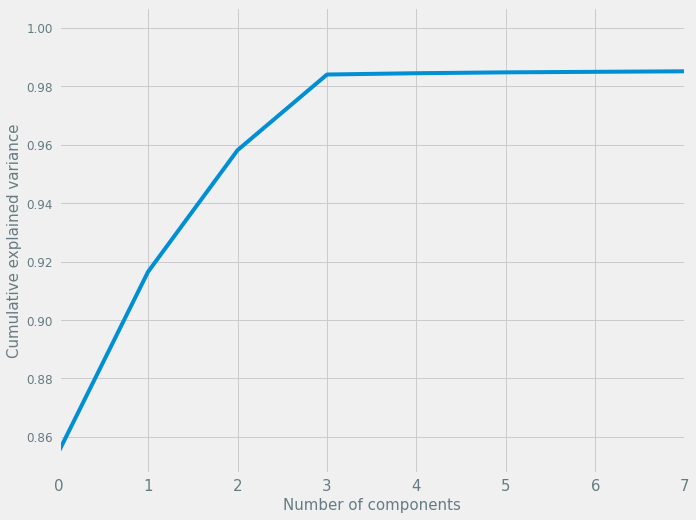

In [85]:
from sklearn.decomposition import PCA
plt.figure(figsize=(10, 8))
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.tick_params(labelsize=12)
plt.xticks(size=15)
plt.xlabel('Number of components', size =15)
plt.ylabel('Cumulative explained variance',size =15)

In [39]:
pca.fit(x)


PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [40]:
x_pca = pca.transform(x)
x_pca

array([[-2.81578519e+00, -1.02758819e+00,  6.17249686e-01, ...,
        -3.77803394e-03,  5.85309683e-03,  7.69643144e-03],
       [-3.84018876e+00, -7.58590721e-04,  5.07824017e-01, ...,
        -1.94875101e-02,  1.55695014e-02,  1.68063545e-02],
       [-3.89097294e+00,  4.13253974e-01, -2.84209488e-02, ...,
         3.87477452e-03, -2.70899421e-03,  5.19460835e-03],
       ...,
       [-1.62816477e+00, -2.22789927e-01, -3.24415503e-01, ...,
         1.82766642e-02,  2.87805497e-02, -3.26814067e-02],
       [-4.22777364e+00,  5.11965897e-02, -5.44101864e-01, ...,
         6.76564331e-02,  4.98465266e-04,  9.95142424e-03],
       [-8.18689890e+00,  2.67195217e-01,  2.27465283e+00, ...,
         9.61462424e-03,  1.88805441e-03, -2.32879181e-02]])

In [152]:
results = results.append([a, b, c, d, e, f, g, h, i])
results.columns = ['Model', 'Precision Score', 'Recall Score', 'Accuracy Score', 'F1 Score']
results['Model Runtime'] = [knn_runtime, rf_runtime, ab_runtime, gb_runtime, svm_runtime, dt_runtime, nb_runtime,
                            mnb_runtime, bt_runtime]
results

,Model,Precision Score,Recall Score,Accuracy Score,F1 Score,Model Runtime
0,K Nearest Neighbors,0.791532,0.787349,0.787349,0.788518,0.619618
1,Random Forest,0.932138,0.931115,0.931115,0.931032,15.415366
2,Adapative Boosting Tree,0.238137,0.300012,0.300012,0.182979,4.923344
3,Gradient Boosting,0.789971,0.663282,0.663282,0.665383,225.576580
4,SVM,0.133097,0.073168,0.073168,0.070224,168.783182
5,Decision Tree,0.809215,0.808516,0.808516,0.808702,2.191431
6,Naive Bayes,0.615025,0.310412,0.310412,0.334677,0.768011
7,Multinomial Naive Bayes,0.650516,0.467393,0.467393,0.421825,0.049109
8,Bagged Trees,0.444615,0.350544,0.350544,0.239019,22.520627


In [154]:
import scikitplot as skplt
import matplotlib.pyplot as plt



In [160]:
probas = rfclassifier.predict_proba(x_test)

/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


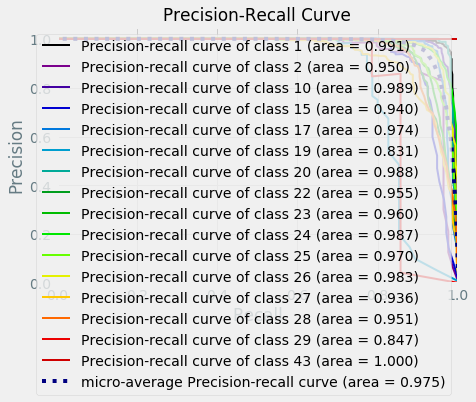

In [165]:
skplt.metrics.plot_precision_recall_curve(y_test, probas)

In [167]:
from sklearn import tree

[Text(390.6998008409286, 255.4725663716814, 'X[335] <= 0.164\ngini = 0.876\nsamples = 32688\nvalue = [1835, 300, 5210, 746, 1699, 327, 640, 2586, 2747\n7948, 1990, 3327, 1344, 1898, 43, 48]'),
 Text(382.46355096661, 253.20169911504425, 'X[17] <= 0.081\ngini = 0.878\nsamples = 30595\nvalue = [1785, 300, 3461, 743, 1697, 325, 637, 2534, 2694\n7855, 1947, 3294, 1339, 1893, 43, 48]'),
 Text(371.85525077454827, 250.9308318584071, 'X[321] <= 0.132\ngini = 0.877\nsamples = 29930\nvalue = [1781, 300, 2831, 739, 1697, 318, 637, 2523, 2694\n7850, 1947, 3293, 1339, 1890, 43, 48]'),
 Text(352.78295618225127, 248.6599646017699, 'X[199] <= 0.202\ngini = 0.88\nsamples = 28366\nvalue = [1230, 300, 2795, 739, 1688, 318, 508, 2515, 2666\n7063, 1947, 3280, 1336, 1890, 43, 48]'),
 Text(321.16321812202244, 246.38909734513274, 'X[0] <= 10.915\ngini = 0.881\nsamples = 27721\nvalue = [1225, 300, 2795, 739, 1688, 318, 508, 2462, 2646\n6959, 1947, 2817, 1336, 1890, 43, 48]'),
 Text(264.97523871430457, 244.11823

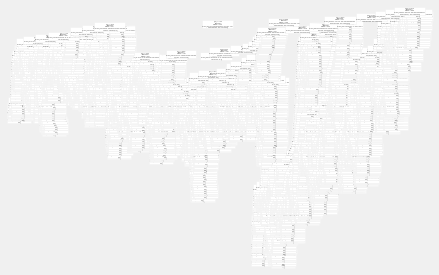

In [168]:
tree.plot_tree(dt_classifier)